<h1>INTRODUCTION</h1>
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

In [2]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt


sns.set(style = 'white')

# Input data files are available in the "./" directory.

import os
print(os.listdir("./"))

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
train.head()

['titanic-ml.ipynb', 'test.csv', 'train.csv', '.ipynb_checkpoints', '.git', 'gender_submission.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>DATA CLEANING</h1>

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<ul>
<li>We see that there're some missing values for Age and Cabin. We will remove the missing 'Age' lines.</li>
<li>We will also remove 'PassengerId', 'Name', 'Ticket', 'Cabin' columns from the training set, because they don't seem to be relevant</li> </ul>

In [5]:
def clean(df):
    df = df.dropna(subset=['Age'])
    df = df.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'])
    return df

train_cleaned = clean(train)
test_cleaned = clean(test)
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.2+ KB


<h1>FEATURE CLASSIFICATIONS: NUMERICAL VS CATEGORICAL</h1>

<ul>
    <li>1. Categorical: 
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Survived</span>
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Pclass</span>
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Sex</span>
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Pclass</span>
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">SibSp</span>
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Parch</span>
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Embarked</span>
    </li>
    <li>2. Numerical:
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Age</span>(continuous)
        <span style="background-color: #f2f2f2; padding: 3px 6px; border-radius: 4px;">Fare</span>(discreet)
    </li>
    </ul>

In [6]:
features = ['Survived','Pclass','Sex','SibSp','Parch','Embarked']


def convert_cat(df, features):

    for f in features:
        
        df[f] = df[f].astype('category')
    
print(train_cleaned.columns)
convert_cat(train_cleaned,features)
train_cleaned.info()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  714 non-null    category
 1   Pclass    714 non-null    category
 2   Sex       714 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     714 non-null    category
 5   Parch     714 non-null    category
 6   Fare      714 non-null    float64 
 7   Embarked  712 non-null    category
dtypes: category(6), float64(2)
memory usage: 22.0 KB


In [60]:
train_cleaned.describe()

,Age,Fare
count,714.000000,714.000000
mean,29.699118,34.694514
std,14.526497,52.918930
min,0.420000,0.000000
25%,20.125000,8.050000
50%,28.000000,15.741700
75%,38.000000,33.375000
max,80.000000,512.329200


In [41]:
train_cleaned.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,714,714,714,714,714,712
unique,2,3,2,6,7,3
top,0,3,male,0,0,S
freq,424,355,453,471,521,554


<h1>EXPLORATORY DATA ANALYSIS</h1>

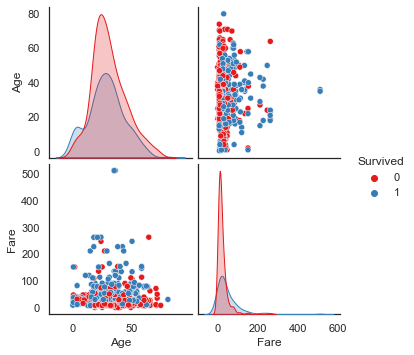

In [43]:
g = sns.pairplot(train_cleaned, hue = 'Survived',palette='Set1', diag_kind='kde')

Initially, we see that the ones who paid more tends to have more chance of surviving, while there's no clear pattern on the age difference

<h2>For Categorical</h2>

In [45]:
train_cleaned['Survived'].value_counts().to_frame()

,Survived
0,424
1,290


In [46]:
train_cleaned['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.593838
1,0.406162


#### only 40% of the passenger survive, so there's no absolute need for more complex sampling method

<AxesSubplot:xlabel='Sex', ylabel='count'>

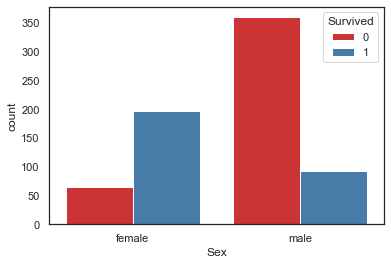

In [47]:
sns.countplot(data=train_cleaned, x='Sex', hue='Survived', palette='Set1')

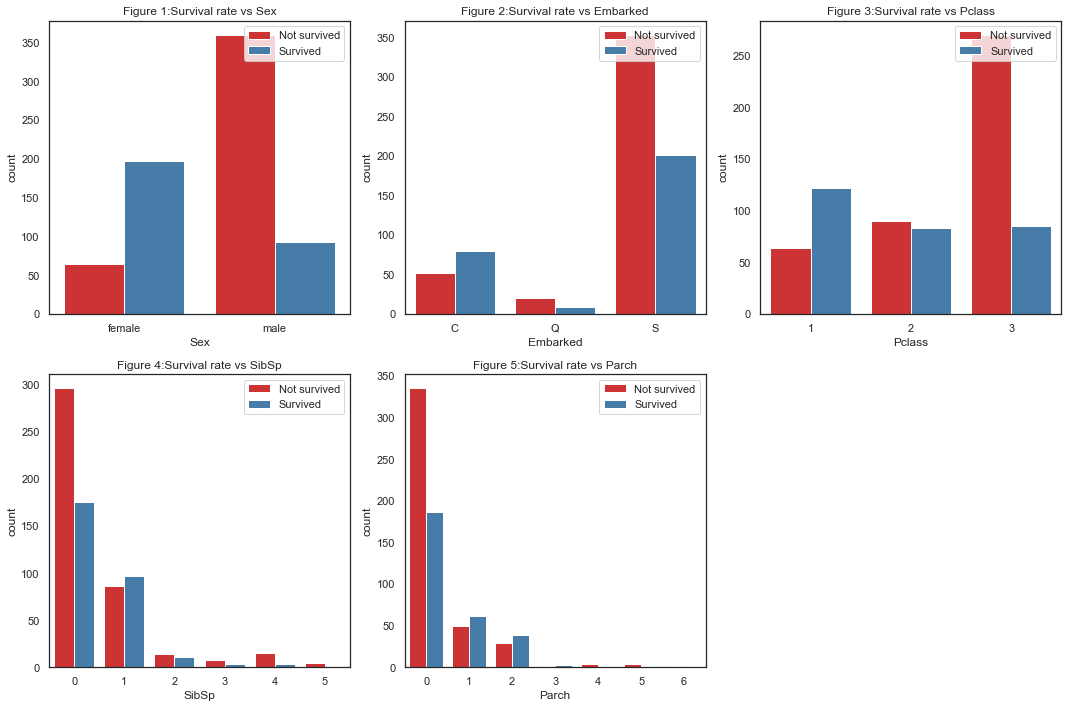

In [53]:
cols = ['Sex','Embarked','Pclass','SibSp','Parch']

n_rows = 2
n_cols = 3

fig,ax = plt.subplots(n_rows,n_cols, figsize=(n_cols*5, n_rows*5))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i = r*n_cols + c
        if i <len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_cleaned, x=cols[i], hue='Survived', palette='Set1', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}:Survival rate vs {cols[i]}")
            ax_i.legend(title='',loc='upper right',labels=['Not survived','Survived'])
            
            
ax.flat[-1].set_visible(False) #hides the last subplot in the grid, even if the number of subplots is less than the grid size
plt.tight_layout()#to minimize overlapping and improve spacing
plt.show()
            

#### Observation
* **survival rate vs:
- `Sex` more female survived
- `Embarked` most passenger boarded from Southamton, and also has the lowest survival rate
- `Pclass` 1 has the highest chance of surviving while 3 is the opposite
- `SibSp` , `Parch` looks like you will have a slightly better chance of surviving if you have other siblings, parents, children

#### MACHINE LEARNING WITH VARIABLES

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
# Split the dataset into features (X) and target variable (y)
X = train_cleaned.drop('Survived', axis=1)  # Replace 'target_column' with the name of your target variable
y = train_cleaned['Survived']  # Replace 'target_column' with the name of your target variable

print(train_cleaned.columns)

# encode the other feature
X_encoded = pd.get_dummies(X) 


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [9]:
# Train and evaluate multiple classification algorithms

print("---------------------------------------")
print("-------- LogisticRegression ----------")
print("---------------------------------------")

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

    
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print("Precision:", precision_score(y_test, lr_y_pred))
print("Recall:", recall_score(y_test, lr_y_pred))
print("F1 score:", f1_score(y_test, lr_y_pred))

# print("---------------------------------------")
# print("-------- Compared result ----------")
# print("---------------------------------------")

# # Print predicted labels and true labels in the same row
# combined = zip(lr_y_pred, y_test)
# for pred, true in combined:
#     print(f"Predicted: {pred}, True: {true}")

def calculate_accuracy(y_pred, y_true):
    """
    Calculate the accuracy by dividing the number of times pred == true by the total number of rows in y_true.

    Parameters:
        y_pred (array-like): Predicted labels.
        y_true (array-like): True labels.

    Returns:
        accuracy (float): Accuracy score.
    """
    total_rows = len(y_true)
    correct_predictions = sum(pred == true for pred, true in zip(y_pred, y_true))
    accuracy = correct_predictions / total_rows

    return accuracy


print("Calculated accuracy:",calculate_accuracy(y_test, lr_y_pred))


---------------------------------------
-------- LogisticRegression ----------
---------------------------------------
Logistic Regression
Accuracy: 0.7552447552447552
Precision: 0.6981132075471698
Recall: 0.6607142857142857
F1 score: 0.6788990825688073
Calculated accuracy: 0.7552447552447552


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
print("---------------------------------------")
print("-------- DecisionTreeClassifier ----------")
print("---------------------------------------")

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print("Precision:", precision_score(y_test, dt_y_pred))
print("Recall:", recall_score(y_test, dt_y_pred))
print("F1 score:", f1_score(y_test, dt_y_pred))
    



---------------------------------------
-------- DecisionTreeClassifier ----------
---------------------------------------
Decision Tree
Accuracy: 0.7272727272727273
Precision: 0.6491228070175439
Recall: 0.6607142857142857
F1 score: 0.6548672566371682


In [11]:
print("---------------------------------------")
print("-------- RandomForestClassifier ----------")
print("---------------------------------------")

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Precision:", precision_score(y_test, rf_y_pred))
print("Recall:", recall_score(y_test, rf_y_pred))
print("F1 score:", f1_score(y_test, rf_y_pred))



---------------------------------------
-------- RandomForestClassifier ----------
---------------------------------------
Random Forest
Accuracy: 0.7482517482517482
Precision: 0.6923076923076923
Recall: 0.6428571428571429
F1 score: 0.6666666666666666
